<a href="https://colab.research.google.com/github/endar1y12/ML/blob/main/Tugas_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



NAIVE BAYES
#Nama : Daryanti
#NPM  : 5210411176
#Mechine Learning G

[Data](https://drive.google.com/file/d/1UN0eBg4GbC74YYl7wTEQxOWNUcb_Th2t/view?usp=drive_link)


In [ ]:
#dataset
import pandas as pd

dataku = pd.read_csv("/content/Data_Naive3.csv")# data diabetes
print(dataku)#menampilkan data yang ada di csv





     glucose  bloodpressure  diabetes
0         40             85  Negative
1         40             92  Negative
2         45             63  Positive
3         45             80  Negative
4         40             73  Positive
..       ...            ...       ...
990       45             87  Negative
991       40             83  Negative
992       40             83  Negative
993       40             60  Positive
994       45             82  Negative

[995 rows x 3 columns]


In [ ]:
dataku.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 995 entries, 0 to 994
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   glucose        995 non-null    int64 
 1   bloodpressure  995 non-null    int64 
 2   diabetes       995 non-null    object
dtypes: int64(2), object(1)
memory usage: 23.4+ KB


In [ ]:
#mengubah string ke int
from sklearn.preprocessing import LabelEncoder #library
le = LabelEncoder()

for col in dataku.columns.values:
  #encoding pada variabel kategori dan boolean
  if dataku[col].dtypes=='object' or dataku[col].dtype=='bool':
    data = dataku[col].append(dataku[col])
    le.fit(data.values)
    dataku[col] = le.transform(dataku[col])

dataku.head(12) #menampilkan data dalam bentuk tabel dan hanya menampilkan 12 data dari 995 data yang ada


<ipython-input-60-407a96327fab>:8: FutureWarning: The series.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  data = dataku[col].append(dataku[col])


,glucose,bloodpressure,diabetes
0,40,85,0
1,40,92,0
2,45,63,1
3,45,80,0
4,40,73,1
5,45,82,0
6,40,85,0
7,30,63,1
8,65,65,1
9,45,82,0


In [ ]:
#memisahkan fitur dan label

fitur = dataku[dataku.columns[:-1]] # untuk fitur
label= dataku[dataku.columns[-1]]  #untuk label
print("\nFitur:\n",fitur)
print("\nLabelx:\n",label)


Fitur:
      glucose  bloodpressure
0         40             85
1         40             92
2         45             63
3         45             80
4         40             73
..       ...            ...
990       45             87
991       40             83
992       40             83
993       40             60
994       45             82

[995 rows x 2 columns]

Labelx:
 0      0
1      0
2      1
3      0
4      1
      ..
990    0
991    0
992    0
993    1
994    0
Name: diabetes, Length: 995, dtype: int64


In [ ]:
#import gaussian naive bayes
from sklearn.naive_bayes import GaussianNB

#buat model
model = GaussianNB()

#train
model.fit(fitur.values,label)

#prediksi
predicted = model.predict([[40,73],[45,90],[40,88],[45,82],[40,78]]) # glucose # bloodpressure
print("Predicted:",predicted)
truelabel = [1,0,1,1,1]
print("True Label",truelabel)

Predicted: [1 0 0 0 1]
True Label [1, 0, 1, 1, 1]


0.9336683417085427


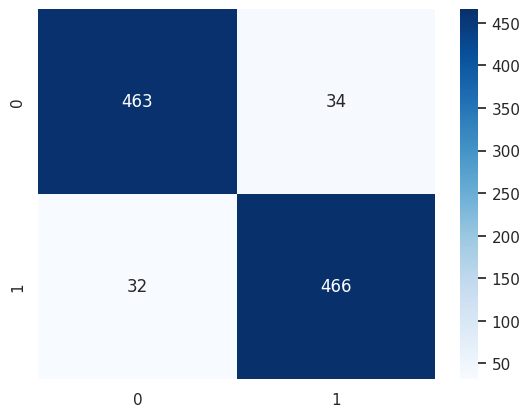

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
import seaborn as sns;sns.set()
ac = accuracy_score(label,model.predict(fitur.values))
score = confusion_matrix(label,model.predict(fitur.values))

print(ac)
ax = sns.heatmap(score,annot=True,fmt="d",cmap="Blues")